# Machine learning: decision trees

**Jakke Neiro & Andrei Roibu** 

## 1. Single decision tree

Decision trees are a non-parametric learining method used for both classification and regression. The advatnages of decision trees are that they are easy to understand and they can be used for a broad range of data. However, the main disadvantages are that a single decision tree is easily overfitted and hence even small perturbations in the data might result in a markedly different classifier. This problem is tackled by generating several decision trees for deriving the final classifier. Here, we first train a single decision tree before we looking into ensemble methods.

In [28]:
import numpy as np
from sklearn import svm, datasets
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

### Data preparation

We load in the DUDE data using the function documented in data_processing.ipynb and check the dimensions. We assing 75% of the original data as the training dataset and the remainder is used for testing. 

In [1]:
run data_preprocessing.ipynb

In [2]:
X,y = data_preprocessing()

In [3]:
print(X.shape, y.shape)

(377143, 189) (377143,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

### Fit the tree

We fit a single decision tree with defualt parameters.

In [36]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

We predict the values of $\mathbf{y}$ based on the test data.

In [37]:
y_score = classifier.predict(X_test)

### ROC

The ROC curve

In [38]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [39]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

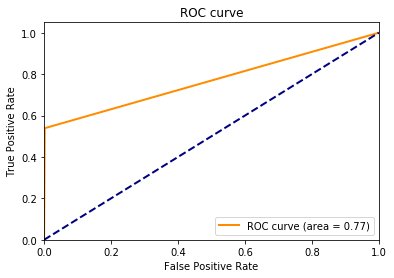

In [34]:
import matplotlib.pyplot as plt
def plotting(title, fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

## 2. Random forest

Radnom forest explanation...